In [114]:
# Import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import json as json
import tweepy
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [115]:
#Loading dataset
tweet_av_df = pd.read_csv('twitter-archive-enhanced-2.csv')
image_pred_df = pd.read_csv('image-predictions-3.tsv', sep='\t')

### Visual Assessment on Twitter archive content which contains basic tweet data ###
-----
For this project, key data assessment requirements for twitter archive data include original rating and there should be an image associated with the given rating.
- "expanded_urls" is associated with image urls for a given tweet.
- It is observed that the "expanded_urls" column does have missing or no values
- "rating_numerator" gives us insights into the given dog rating.
- "tweet_id" it a unique identifier identifying each unique tweet for each dog.
- "timestamp" captures the date and time specifics when a direct message was posted to weratedogs
- 2356 records in twitter archive data set.



In [116]:
tweet_av_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Programmatic Assessment on Twitter archive content which contains basic tweet data ###

In [117]:
tweet_av_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [118]:
tweet_av_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [119]:
tweet_av_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
267,841680585030541313,NaN,NaN,2017-03-14 16:01:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a dragon slayer. Feared b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841680585...,12,10,Penny,None,None,None,None
447,819015331746349057,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sunny. She was also a v...,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,None,None,None
1607,685663452032069632,NaN,NaN,2016-01-09 03:24:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brooks. He's confused by the almighty bal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685663452...,12,10,Brooks,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,None,None,None,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None


In [120]:
tweet_av_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [121]:
tweet_av_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [122]:
tweet_av_df[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2259.0,2346.0,2099.0,2326.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,257.0,NaN
puppo,NaN,NaN,NaN,30.0


### Assessment Findings on Twitter archive data set ###
------
** Data Quality Issues **


- Completeness: The following columns are incomplete - and have missing values. 
'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'.

- Consistency: 'in_reply_to_user_id', 'retweeted_status_user_id' (status ids are sometimes populated with user_id).

- Validity: 'rating_denominator' has 0 values in it. This will result in 0 rating for dogs.

- Erroneous data types: 'timestamp', 'retweeted_status_timestamp' has been set as object type.

- Erroneous data types: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id' should be int type.

- Accuracy: 'name' column has inaccurate values.








### Assessment on Image Predection Data set ###

Start with Visual assessment.


In [123]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [124]:
image_pred_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [125]:
image_pred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
70,667192066997374976,https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg,1,Rottweiler,0.283640,True,miniature_pinscher,0.148112,True,black-and-tan_coonhound,0.095585,True
964,706166467411222528,https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg,1,Samoyed,0.430418,True,kuvasz,0.279600,True,Great_Pyrenees,0.117480,True
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True


In [126]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB



### Assessment Findings on Image Predictions data set ###
------
** Data Quality Issues **

- No data quality issues were found with this data set. The dataset is complete, consistent, valid with no accuracy issues.

### Fixing data quality issues with twitter archive data ###

Before I gather tweet data, I will clean the data quality issues that were found on twitter archive data. I do this so, I can use this cleaned dataset to query twitter api to get tweet related data.

In [127]:
# Fixing the 'timestamp' data quality issue. Converting object type to datetime64 with UTC timezone 
tweet_av_df['timestamp'] = pd.to_datetime(tweet_av_df['timestamp'], utc=True, errors='coerce')
tweet_av_df.timestamp.dtype

datetime64[ns, UTC]

In [128]:
# Fixing 'expanded_urls' data quality issue. Delete rows that have null values since we only want original tweet ratings that have images.
tweet_av_df = tweet_av_df.dropna(axis=0, subset=['expanded_urls'])
print('expanded urls has null values?', tweet_av_df.expanded_urls.isnull().values.any())

expanded urls has null values? False


In [129]:
# Fixing 'retweeted_status_id' data quality issue. We delete rows that have a value associated with retweeted_status_id since we only want original tweet ratings.
tweet_av_df = tweet_av_df.drop(tweet_av_df.loc[tweet_av_df.retweeted_status_id.notna()].index)
tweet_av_df.reset_index()
print('retweeted_status_id has a value?', tweet_av_df.retweeted_status_id.notna().any())


retweeted_status_id has a value? False


In [130]:
# Continue with 'retweeted_status_id' - since we are intrested with original tweets only, it is safe to drop this column since we are left with null values in this column.
tweet_av_df.drop(axis=1, columns=['retweeted_status_id'], inplace=True)


In [131]:
# 'retweeted_status_user_id' column can also be dropped since we are also left with null values. Keeping the original question in mind.
tweet_av_df.drop(axis=1, columns=['retweeted_status_user_id'], inplace=True)

In [132]:
# 'retweeted_status_timestamp' column can also be dropped since we are also left with null values. Keeping the original question in mind.
tweet_av_df.drop(axis=1, columns=['retweeted_status_timestamp'], inplace=True)

In [133]:
# 'in_reply_to_status_id' column can be dropped, since we are not really looking at tweets that were in reply.
tweet_av_df.drop(axis=1, columns=['in_reply_to_status_id'], inplace=True)

In [134]:
# 'in_reply_to_user_id' column can be dropped too, since we are not really looking at tweets that were in reply.
tweet_av_df.drop(axis=1, columns=['in_reply_to_user_id'], inplace=True)

In [135]:
# Taking a peek at tweet dataframe after fixing the data quality issues.
tweet_av_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

Before we proceed with data tidy tasks., we will check the min and max timestamps of teets as we are not required to gather the tweets beyond August 1st, 2017.

In [136]:
# What is the min and max datetime from our teet dataset.
print(tweet_av_df.timestamp.min(), tweet_av_df.timestamp.max())

2015-11-15 22:32:08+00:00 2017-08-01 16:23:56+00:00


In [137]:

# A function to collect tweet json data using twitter api and save it to json file.
def collecttweetdata(tweet_ids):
    consumer_key = 'AeFxgKcFhsENzkKD8MfoMPoA9'
    consumer_secret = 'PErJwUZAwfmLBzZKyWBNwOpprGbUNsrro167rBYZ04JmzqmSqx'
    
    auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json_latest.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweetjson = api.get_status(tweet_id, tweet_mode="extended")
                print("Success")
                json.dump(tweetjson._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail", e)
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [138]:
# Lets collect tweet data and save to tweets data json file.
tweet_ids = tweet_av_df.tweet_id.values
#collecttweetdata(tweet_ids)

In [139]:
# Creating dataframe from the tweet json that will have the 'favorite_count' and 'retweet_count'
def is_json_key_present(json, key):
    try:
        buf = json[key]
    except KeyError:
        return False

    return True

column_names = ["tweet_id", "favorite_count", "retweet_count"]
list_vals = []
with open('tweet-json.txt','r') as jfile:
    for line in jfile:
        try:
            myjson = json.loads(line)
            if (is_json_key_present(myjson,'id') and  is_json_key_present(myjson,'favorite_count') and is_json_key_present(myjson,'retweet_count')):
                vals = [myjson['id'], myjson['favorite_count'], myjson['retweet_count']]
                list_vals.append(vals)
            else:
                print('Skipping row as there is no data')
        except:
            pass
tweet_data_df = pd.DataFrame(list_vals, columns=column_names)
print(tweet_data_df.shape, tweet_data_df.columns)

(2110, 3) Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')


### Tideness issues ###

The following tidiness issues were identified.

- The retweet and favorite count belong to twitter data set - to form an observational unit (table).
- As each variable forms a column, the columns on twitter data set 'doggo', 'floofer', 'pupper', 'puppo' are identifying various stages of dog. We fix this by creating a single column 'growth_stage' that captures the dog stage.
- The image predictions data can also be combined with twitter data set to form an observational unit from where the predictions on each tweet can be analyzed.


In [140]:
tweet_av_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [141]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2110 non-null   int64
 1   favorite_count  2110 non-null   int64
 2   retweet_count   2110 non-null   int64
dtypes: int64(3)
memory usage: 49.6 KB


### Tideness Issue - 1  ###

Fix:

We fix the first tidiness issue by merging the tweet data that we collected with our twitter archive data. The merge is done using the 'tweet_id' column allowing us to bring in 'favorite_count' and 'retweet_count' to our twitter archive data set.

In [142]:
# Merge tweet archive data set with tweet json data set that has favorite and retweet count.
twitter_av_favs_df =  tweet_av_df.merge(tweet_data_df, on='tweet_id')

### Tideness Issue - 2 ###

Fix:

The columns on twitter archive data set 'doggo', 'floofer', 'pupper', 'puppo' are identifying various stages of dog. We fix this wide form of data by creating a single column 'growth_stage' that captures the dog stage.

I created a function to melt the individual stage columns into a single column to identify the existing stage of the dog. The highest stage takes precedence when a tweet indicates multiple stages of the dog.


In [143]:
# Custom function to derive the current stage of the dog and create a dataframe to hold the tweet_id and the growth_stage.
def dog_stages(twitter_avfavsdf):
    stages_dict = {}
    for i in range(len(twitter_avfavsdf)):
        row = twitter_avfavsdf.iloc[i]
        stage = "unknown"
        if (row.floofer == "floofer"):
            stage = "floofer"
        elif (row.puppo == "puppo"):
            stage = "puppo"
        elif (row.pupper == "pupper"):
            stage = "pupper"
        elif (row.doggo == "doggo"):
            stage = "doggo"
        stages_dict[row.tweet_id] = stage
    return stages_dict

stage_dictn = dog_stages(twitter_av_favs_df)
stage_df = pd.DataFrame(stage_dictn.items(), columns=['tweet_id', 'growth_stage'])
print(stage_df.shape, stage_df.columns)


(2110, 2) Index(['tweet_id', 'growth_stage'], dtype='object')


In [144]:
# Enriching the twitter data set that has favourite and retweet count with growth_stage column and creating a new data set.
twitter_av_favsstages_df =  twitter_av_favs_df.merge(stage_df, on='tweet_id')

In [145]:
# Inspect the combined data set.
twitter_av_favsstages_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,growth_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,35727,7547,unknown
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,30867,5597,unknown
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,23212,3706,unknown
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,39015,7731,unknown
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,37264,8334,unknown


In [146]:
# We are going to drop the stage columns.
twitter_av_favsstages_df.drop(axis=1, columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [147]:
twitter_av_favsstages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2109
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2110 non-null   int64              
 1   timestamp           2110 non-null   datetime64[ns, UTC]
 2   source              2110 non-null   object             
 3   text                2110 non-null   object             
 4   expanded_urls       2110 non-null   object             
 5   rating_numerator    2110 non-null   int64              
 6   rating_denominator  2110 non-null   int64              
 7   name                2110 non-null   object             
 8   favorite_count      2110 non-null   int64              
 9   retweet_count       2110 non-null   int64              
 10  growth_stage        2110 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 197.8+ KB


In [148]:
# Finally we will save this to our master data frame - 'twitter_archive_master.csv'.
twitter_av_favsstages_df.to_csv('twitter_archive_master.csv', index=False)

### Visualizations to help us get insignts on WeRateDogs Twitter data ###

- What was the most favorite dog stage on average?

- What was the most retweeted dog stage on average?

- Which dog stage are highly rated on average?
 

In [149]:
twitter_av_master_df = pd.read_csv('twitter_archive_master.csv')

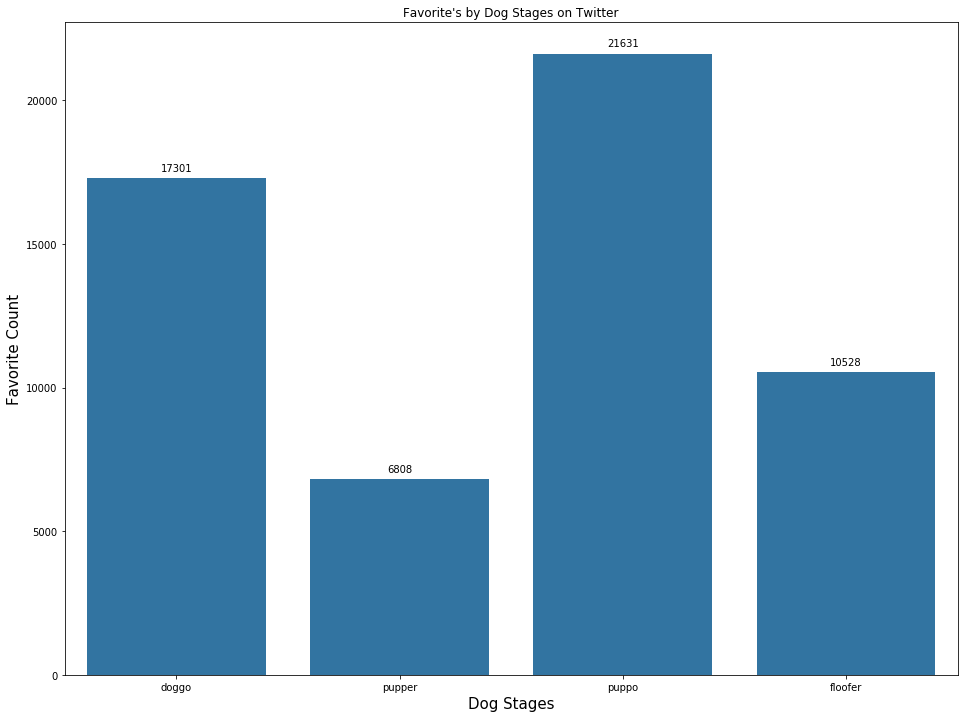

In [150]:
# On twitter which dog stage has more faviourites on average?
plt.figure(figsize=[16, 12])
base_color = sb.color_palette()[0]
splot = sb.barplot(x="growth_stage", y="favorite_count", data=twitter_av_master_df, ci=None, order=['doggo', 'pupper', 'puppo', 'floofer'], color=base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Dog Stages")
plt.ylabel("Favorite Count")
plt.title("Favorite's by Dog Stages on Twitter")
plt.show()

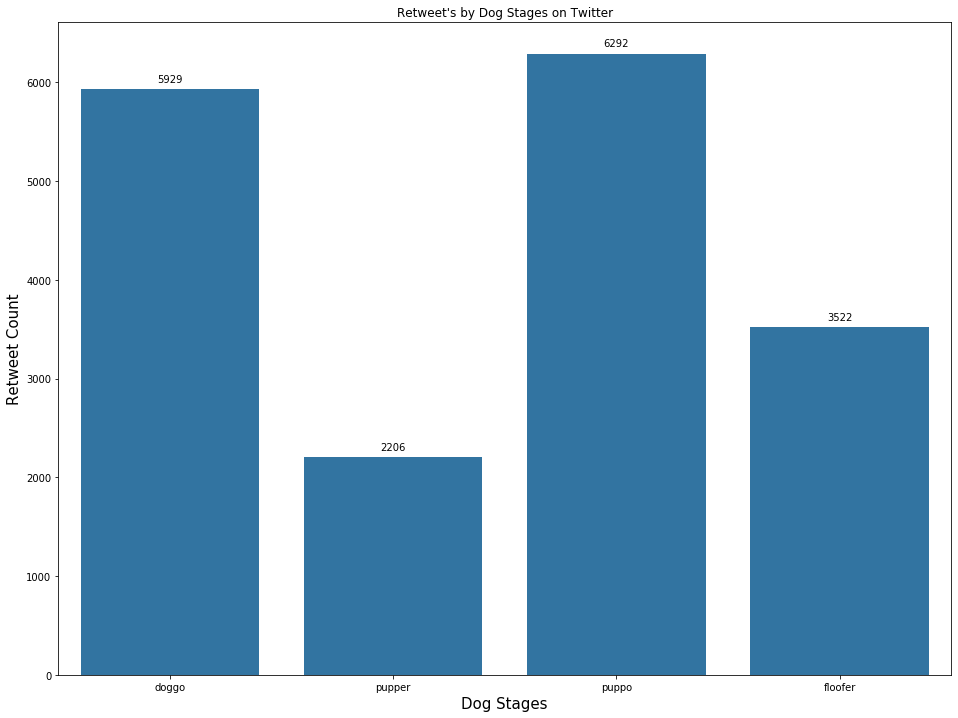

In [151]:
# On twitter which dog stage has high retweets on average?
plt.figure(figsize=[16, 12])
base_color = sb.color_palette()[0]
splot = sb.barplot(x="growth_stage", y="retweet_count", data=twitter_av_master_df, ci=None, order=['doggo', 'pupper', 'puppo', 'floofer'], color=base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Dog Stages")
plt.ylabel("Retweet Count")
plt.title("Retweet's by Dog Stages on Twitter")
plt.show()

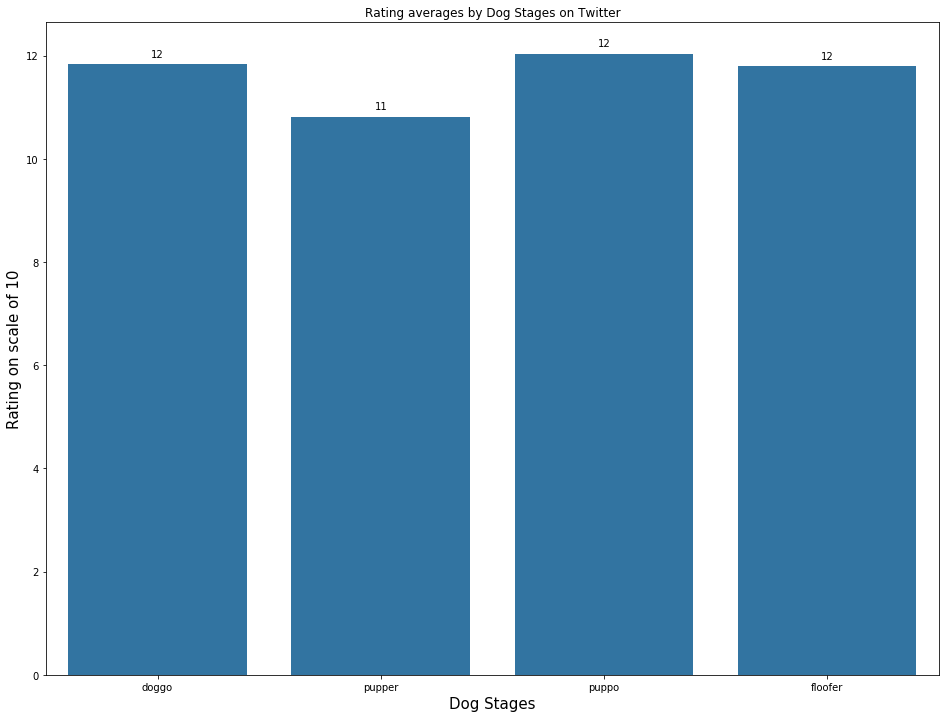

In [152]:
# How are the dogs rated by their stages?
plt.figure(figsize=[16, 12])
base_color = sb.color_palette()[0]

splot = sb.barplot(x="growth_stage", y="rating_numerator", data=twitter_av_master_df, ci=None, order=['doggo', 'pupper', 'puppo', 'floofer'], color=base_color)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel("Dog Stages")
plt.ylabel("Rating on scale of 10")
plt.title("Rating averages by Dog Stages on Twitter")
plt.show()

### Insights from WeRateDogs data set ###

- puppo dog stage was highly favorited on average by 21,631.

- Again puppo dog stage was highly retweeted on average by 6292.

- All three dog stages doggo, puppo, floofer were equally rated on average at 12. While pupper was only off by 1 rating.


